In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from syscore.fileutils import get_filename_for_package
from paper.systems.crypto_system import perpetuals_system
from itables import show
def select(se, start, end):
    return se[(se.index >= start) &(se.index <= end)]

system = perpetuals_system(config='paper.systems.crypto_v1_base.yaml')

/Users/weiranzhou/Code/pysystemtrade/sysobjects/futures_per_contract_prices.py:33: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._as_df = price_data_as_df


(-2.5845732108866564, 0.09622777256293646, 0, 39, {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}, -251.91761934148224)


2.8452858257704676

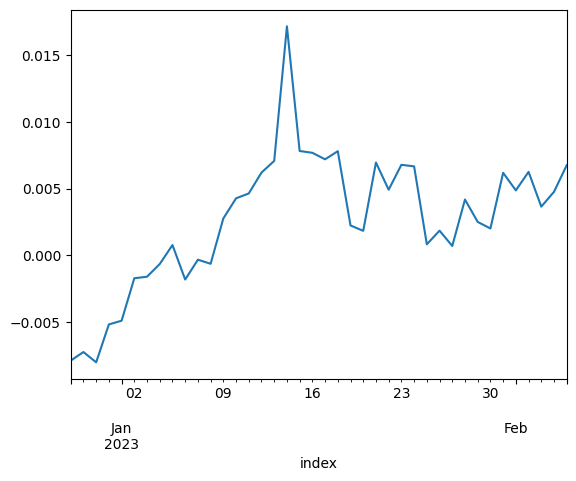

In [36]:
prices = system.data.daily_prices('DOGE-USDT-SWAP')
prices = (prices - prices.rolling(16).mean()).dropna().tail(40)
prices.plot()

from statsmodels.tsa.stattools import adfuller
print(adfuller(prices))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

x = prices.shift(1).dropna()
y = prices.diff().dropna()
model = LinearRegression()
model.fit(x[:, np.newaxis], y)
halflife = -np.log(2)/model.coef_[0]
halflife

/Users/weiranzhou/Code/pysystemtrade/sysobjects/futures_per_contract_prices.py:33: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._as_df = price_data_as_df


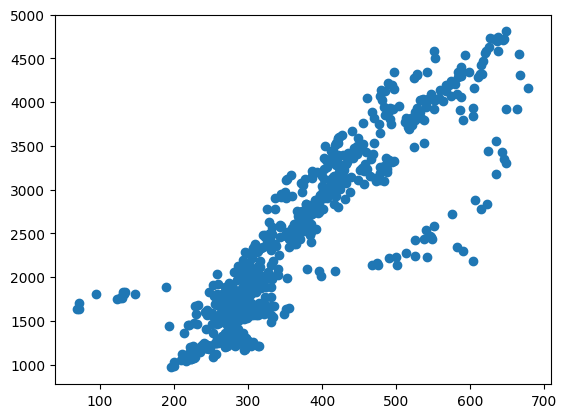

(-4.843312787218382,
 0.0003162749209327718,
 array([-3.91152627, -3.34452432, -3.05027295]))

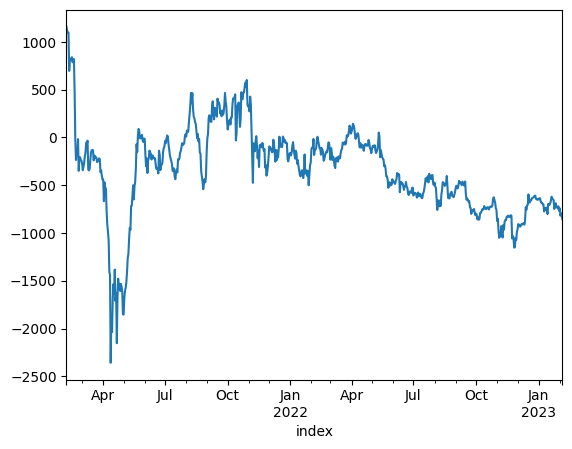

In [100]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import coint


bnb = system.data.daily_prices('BNB-USDT').tail(365 * 2)
eth = system.data.daily_prices('ETH-USDT-SWAP').tail(365 * 2)
plt.scatter(bnb, eth)
plt.show()

model = LinearRegression()
model.fit(bnb[:, np.newaxis], eth)
residual = eth - model.coef_[0] * bnb
residual.plot()


# import numpy as np
# import seaborn as sns
coint(bnb, eth, trend='c')